# 1. Import Libraries 

In [16]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import altair as alt

import Utility_functions as ut
import Custom_Evaluation as ce

from sklearn.model_selection import train_test_split

#model performance
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,top_k_accuracy_score, balanced_accuracy_score, f1_score, recall_score 

#Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Distnce Matrix
from scipy.spatial import distance_matrix, distance
#Supress warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

from sklearnex import patch_sklearn
patch_sklearn()

from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.manifold import TSNE

import random
random.seed(10) 

data_dir = 'C:/Dissertation/Data/'


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# 2. Import Data

In [17]:
Final_Images_df, predicate_df = ut.AWA2DataLoader(data_dir, data_type = "ResNet101-Features", 
                                                  Resnet101Type = 1, 
                                                  animal_attributes = 'AwA2', 
                                                  VectorType = 'Binary')

#data_type options
#1. "ResNet101-Features" to load Extracted Resnet101 features Avg. Time - 12 secs
#2. "Images"

#Resnet101Type
# 1 - Using Resnet Features provided with data
# 2 - Using Resnet Features extracted by Abhimanyu Acharya using a pretrainied Resnet101

# animal_attribute
#1. "AwA2" - As provided with AwA2 data
#2. "Custom Animal Attribute KG" - Custom KGs
#3. "Custom Animal Attribute + Taxonomy KG" - Custom KGs
#4. "Word2Vec" - word2vec-google-news-300
#5. "Dbnary" - Dbnary Knowledge Graph/Wiktionary (KGVec2Go Wiktionary/DBnary)
#6. "DBpedia" - DBPedia Knowledge Graph (KGVec2Go Classic RDF2vec: 500 walks, depth: 4, SG, 200 dimensions)

Using Resnet101 Features provided with data
Animal Attributes Included - Binary Vector
Execution time: 11.698766231536865 seconds


# 3. Split Data in Predefined Test, Train & Validation for ZSL

In [18]:
trainval_df, TrainData01, ValData01, TrainData02, ValData02, TrainData03, ValData03, Seen_test_df, Unseen_test_df = ut.TestTrainValsplitdata_dir(data_dir, Final_Images_df)

  Training - Validation Split 01 
 Train Classes  
 Number of Classes 27 
 ['antelope' 'buffalo' 'chihuahua' 'collie' 'cow' 'elephant' 'fox'
 'german+shepherd' 'grizzly+bear' 'hippopotamus' 'humpback+whale'
 'killer+whale' 'lion' 'mouse' 'otter' 'persian+cat' 'pig' 'polar+bear'
 'rhinoceros' 'siamese+cat' 'skunk' 'spider+monkey' 'squirrel' 'tiger'
 'weasel' 'wolf' 'zebra'] 

 Validation Classes  
 Number of Classes 13 
 ['beaver' 'chimpanzee' 'dalmatian' 'deer' 'giant+panda' 'gorilla'
 'hamster' 'leopard' 'mole' 'moose' 'ox' 'rabbit' 'raccoon'] 

  Training - Validation Split 02 
 Train Classes  
 Number of Classes 27 
 ['buffalo' 'chimpanzee' 'collie' 'cow' 'deer' 'elephant' 'german+shepherd'
 'giant+panda' 'gorilla' 'hamster' 'hippopotamus' 'humpback+whale'
 'leopard' 'lion' 'mole' 'moose' 'mouse' 'polar+bear' 'rabbit' 'raccoon'
 'rhinoceros' 'siamese+cat' 'spider+monkey' 'squirrel' 'tiger' 'weasel'
 'wolf'] 

 Validation Classes  
 Number of Classes 13 
 ['antelope' 'beaver' 'chihua

# 4. Define Dependent and Independent variables 

In [19]:
# Pre defined Test split 01
X1 = TrainData01.iloc[:,1:2049]
y1 = TrainData01.iloc[:,2051:2136]

# Pre defined Test split 02
X2 = TrainData02.iloc[:,1:2049]
y2 = TrainData02.iloc[:,2051:2136]

# Pre defined Test split 03
X3 = TrainData03.iloc[:,1:2049]
y3 = TrainData03.iloc[:,2051:2136]

X_finaltrain = trainval_df.iloc[:,1:2049]
y_finaltrain = trainval_df.iloc[:,2051:2136]

In [20]:
#Train val split for testing projection network
X_train1,X_val_seen_classes1,y_train1,y_val_seen_classes1 = train_test_split(X1,y1,stratify=y1,test_size=0.1,random_state = 0)

X_train2,X_val_seen_classes2,y_train2,y_val_seen_classes2 = train_test_split(X2,y2,stratify=y2,test_size=0.1,random_state = 0)

X_train3,X_val_seen_classes3,y_train3,y_val_seen_classes3 = train_test_split(X3,y3,stratify=y3,test_size=0.1,random_state = 0)

#Stratify Final train data 
X_train_final,X_val_seen_classes_final,y_train_final,y_val_seen_classes_final = train_test_split(X_finaltrain,y_finaltrain,stratify=y_finaltrain,test_size=0.002,random_state = 0)

# 5. Define Animal Attributes

In [21]:
animal_attributes_df = pd.read_csv("C:/Dissertation/Data/AwA2-data/Animals_with_Attributes2/predicates.txt", sep = '\t',header = None, names = ['predicates'])
animal_attributes_list = animal_attributes_df['predicates'].tolist()
print(animal_attributes_list)

['black', 'white', 'blue', 'brown', 'gray', 'orange', 'red', 'yellow', 'patches', 'spots', 'stripes', 'furry', 'hairless', 'toughskin', 'big', 'small', 'bulbous', 'lean', 'flippers', 'hands', 'hooves', 'pads', 'paws', 'longleg', 'longneck', 'tail', 'chewteeth', 'meatteeth', 'buckteeth', 'strainteeth', 'horns', 'claws', 'tusks', 'smelly', 'flys', 'hops', 'swims', 'tunnels', 'walks', 'fast', 'slow', 'strong', 'weak', 'muscle', 'bipedal', 'quadrapedal', 'active', 'inactive', 'nocturnal', 'hibernate', 'agility', 'fish', 'meat', 'plankton', 'vegetation', 'insects', 'forager', 'grazer', 'hunter', 'scavenger', 'skimmer', 'stalker', 'newworld', 'oldworld', 'arctic', 'coastal', 'desert', 'bush', 'plains', 'forest', 'fields', 'jungle', 'mountains', 'ocean', 'ground', 'water', 'tree', 'cave', 'fierce', 'timid', 'smart', 'group', 'solitary', 'nestspot', 'domestic']


# 6. Load Taxonomy Information

In [22]:
taxonomy_df = pd.read_csv("C:/Dissertation/Data/Mammal Taxonomy/Mammal Taxonomy_noduplicates.csv")
taxonomy_df.drop(['subgenus','biogeographicRealm','CMW_sciName'], axis = 1, inplace = True)
taxonomy_df.head()

,sciName,animal_label,animal_class,mainCommonName,otherCommonNames,class,infraclass,magnorder,superorder,order,suborder,infraorder,parvorder,superfamily,family,subfamily,tribe,genus
0,Antilope_cervicapra,1,antelope,Blackbuck,Indian Antelope,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,RUMINANTIA,PECORA,NaN,NaN,BOVIDAE,ANTILOPINAE,ANTILOPINI,Antilope
1,Ursus_arctos,2,grizzly+bear,Brown Bear,Grizzly Bear|Kodiak Bear,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,CANIFORMIA,ARCTOIDEA,NaN,URSOIDEA,URSIDAE,URSINAE,NaN,Ursus
2,Orcinus_orca,3,killer+whale,Killer Whale,Orca,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,ARTIODACTYLA,WHIPPOMORPHA,CETACEA,ODONTOCETI,DELPHINOIDEA,DELPHINIDAE,INCERTAE SEDIS,NaN,Orcinus
3,Aplodontia_rufa,4,beaver,Mountain Beaver,Boomer|Sewellel|Point Arena Mountain Beaver|Po...,Mammalia,Placentalia,Boreoeutheria,Euarchontoglires,RODENTIA,SCIUROMORPHA,NaN,NaN,NaN,APLODONTIIDAE,NaN,NaN,Aplodontia
4,Canis_familiaris,5,dalmatian,Domestic Dog,Dog|Dingo|Feral Dog|New Guinea Singing Dog|Vil...,Mammalia,Placentalia,Boreoeutheria,Laurasiatheria,CARNIVORA,CANIFORMIA,CANOIDEA,NaN,NaN,CANIDAE,NaN,NaN,Canis


# 7. Set up Logistic Regression for multilabel classifciation (based on Xian et al analysis)

In [25]:
def CZSL(mode, split, penalty, C, solver, pred_type, dist_type):
       
    if mode == "Train":
        if split == 1:
            X = X_train1.astype(np.float32).values
            y = y_train1.astype(np.float32).values
            SeenClassFeatures = X_val_seen_classes1
            SeenClassAttributes = y_val_seen_classes1
            UnseenData = ValData01
            
        if split == 2:
            X = X_train2.astype(np.float32).values
            y = y_train2.astype(np.float32).values
            SeenClassFeatures = X_val_seen_classes2
            SeenClassAttributes = y_val_seen_classes2
            UnseenData = ValData02
            
        if split == 3:
            X = X_train3.astype(np.float32).values
            y = y_train3.astype(np.float32).values
            SeenClassFeatures = X_val_seen_classes3
            SeenClassAttributes = y_val_seen_classes3
            UnseenData = ValData03
       
        
    if mode == "Test":
        X = X_train_final.astype(np.float32).values
        y = y_train_final.astype(np.float32).values        
        UnseenData = Unseen_test_df
    
    #Model 01
    st = time.time()
    clf = OneVsRestClassifier(LogisticRegression(penalty = penalty, C = C, solver = solver, random_state=100), n_jobs=-2)
    LR = clf.fit(X, y)
    et = time.time()
    elapsed_time = et - st
    print('Execution time:', elapsed_time, 'seconds')
    
    #predict attributes for Seen classes
    if mode == "Train":
        predicted_attributes = LR.predict(SeenClassFeatures.astype(np.float32).values)
        #print attribute prediction LR performance
        print(classification_report(SeenClassAttributes.astype(np.float32).values, predicted_attributes, target_names=animal_attributes_list))    
        
        print("F1 Score (Macro)")
        print(f1_score(SeenClassAttributes.astype(np.float32).values, predicted_attributes, average='macro'))
    
    if mode == "Test":
        pass      
    
    #predict attributes for Unseen classes 
    y_pred_unseen = LR.predict(UnseenData.iloc[:,1:2049].astype(np.float32).values)
    y_pred_unseen_proba = LR.predict_proba(UnseenData.iloc[:,1:2049].astype(np.float32).values)
    
    #limit search space to unseen classes 
    predicatedf_CZSL = predicate_df[predicate_df['classes'].isin((UnseenData.classes.unique()).tolist())]
    animal_attributes = np.array(predicatedf_CZSL.iloc[:,2:87])
    animal_attributes_labels = predicatedf_CZSL['labels'].unique()
    print('Unseen Class Labels')
    print(animal_attributes_labels)
    
    #Spatialise the unseen classes using TSNE
    print('t-SNE spatialisation of Unseen Classes')
    
    classes_df = predicatedf_CZSL.copy()
    classes_df.reset_index(inplace=True)
    
    embeddings = TSNE(n_components=2, verbose=1, random_state=123)

    TSNE_predicates = embeddings.fit_transform(animal_attributes) 
    TSNE_predicates_df = pd.DataFrame(data = TSNE_predicates
                 , columns = ['Binary comp-1', 'Binary comp-2'])
    
    TSNE_predicates_df1 = pd.concat([TSNE_predicates_df,classes_df['classes']], axis = 1)
    TSNE_predicates_df1 = TSNE_predicates_df1.merge(taxonomy_df, how = 'inner', left_on = 'classes', right_on = 'animal_class')
    
    #By animal class
    binary_points = alt.Chart(TSNE_predicates_df1).mark_circle(size=200).encode(
    x='Binary comp-1:Q',
    y='Binary comp-2:Q',
    color=alt.Color('classes:N', scale=alt.Scale(scheme='Magma')),
    ).properties(
    width=800,
    height=800
    )

    text1 = binary_points.mark_text(
        align='left',
        baseline='middle',
        dx=7
    ).encode(
        text='classes:N'
    )

    display(binary_points.interactive() + text1)
    
    #By Taxonomy Family
    binary_points = alt.Chart(TSNE_predicates_df1).mark_circle(size=200).encode(
    x='Binary comp-1:Q',
    y='Binary comp-2:Q',
    color=alt.Color('order:N', scale=alt.Scale(scheme='Magma')),
    ).properties(
    width=800,
    height=800
    )

    text1 = binary_points.mark_text(
        align='left',
        baseline='middle',
        dx=7
    ).encode(
        text='order:N'
    )

    display(binary_points.interactive() + text1)
    
    #assign classes to unseen data by assigning label from closest class using Cosing Distance
    y_pred_unseen_prob = []
    for y in y_pred_unseen_proba:
        y_pred_unseen_prob.append(y[1])
    
    if pred_type == 'Probabilistic':
        dist_CZSL= (1-distance.cdist(y_pred_unseen_prob, animal_attributes, dist_type))
    elif pred_type == 'Deterministic':    
        dist_CZSL= (1-distance.cdist(y_pred_unseen, animal_attributes, dist_type))
        
    CZSL_label_prediction = np.array([np.argmax(output) for output in dist_CZSL])
    
    #replace predicted labels with unseen class labels 
    if mode == "Train":
        CZSL_label_prediction = np.select([CZSL_label_prediction == 0, CZSL_label_prediction == 1, CZSL_label_prediction == 2, CZSL_label_prediction == 3
          , CZSL_label_prediction == 4, CZSL_label_prediction == 5, CZSL_label_prediction == 6, CZSL_label_prediction == 7
          , CZSL_label_prediction == 8, CZSL_label_prediction == 9, CZSL_label_prediction == 10, CZSL_label_prediction == 11
          , CZSL_label_prediction == 12], [animal_attributes_labels[0], animal_attributes_labels[1], animal_attributes_labels[2]
          , animal_attributes_labels[3], animal_attributes_labels[4], animal_attributes_labels[5]
          , animal_attributes_labels[6], animal_attributes_labels[7], animal_attributes_labels[8], animal_attributes_labels[9]
          , animal_attributes_labels[10], animal_attributes_labels[11], animal_attributes_labels[12]], CZSL_label_prediction)
    
    if mode == "Test":
        CZSL_label_prediction = np.select([CZSL_label_prediction == 0, CZSL_label_prediction == 1, CZSL_label_prediction == 2, CZSL_label_prediction == 3
          , CZSL_label_prediction == 4, CZSL_label_prediction == 5, CZSL_label_prediction == 6, CZSL_label_prediction == 7
          , CZSL_label_prediction == 8, CZSL_label_prediction == 9], [animal_attributes_labels[0], animal_attributes_labels[1], animal_attributes_labels[2]
          , animal_attributes_labels[3], animal_attributes_labels[4], animal_attributes_labels[5]
          , animal_attributes_labels[6], animal_attributes_labels[7], animal_attributes_labels[8], animal_attributes_labels[9]], CZSL_label_prediction)
        
     #sort class names 
    class_labels = UnseenData[['labels','classes', 'order', 'family']]
    class_labels.sort_values(by=['labels'], inplace=True)
    animal_classes = class_labels['classes'].unique()
    
    #Assess CZSL Model performance
    print(classification_report(UnseenData['labels'], CZSL_label_prediction, target_names = animal_classes))

    cm = confusion_matrix(UnseenData['labels'], CZSL_label_prediction)
    correct_predictions_perc = cm.diagonal()/cm.sum(axis=1)
    print("Top_1_accuracy for UnSeen Validation split 01 per class - " , correct_predictions_perc)
    print("Top_1_accuracy for UnSeen Validation split 01 - " , np.mean(correct_predictions_perc))

    # Visualize it as a heatmap
    plt.figure(figsize=(10,8))
    a = sns.heatmap(cm, annot=True, fmt='', cmap='Reds',annot_kws={"size": 10} )
    label_font = {'size':'10'}  # Adjust to fit
    a.set_xlabel('Predicted labels', fontdict=label_font);
    a.set_ylabel('Observed labels', fontdict=label_font);
    a.set_yticklabels(animal_classes)
    a.set_xticklabels(animal_classes)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    plt.show()
    
    #predict taxonomy
    predicted_taxonomy_df = pd.DataFrame(CZSL_label_prediction, columns = ['pred_labels'])
    predicted_taxonomy_df = pd.merge(predicted_taxonomy_df, taxonomy_df,  how = 'left', left_on = 'pred_labels' , right_on = 'animal_label' )
    
    Train_family_labels = UnseenData.copy()
    Train_family_labels.sort_values(by=['order'], inplace=True)
    train_animal_family = Train_family_labels['order'].unique()
    
    print(classification_report(UnseenData['order'], predicted_taxonomy_df['order'], target_names=train_animal_family))
    
    cm = confusion_matrix(UnseenData['order'], predicted_taxonomy_df['order'])
    correct_predictions_perc = cm.diagonal()/cm.sum(axis=1)
    print("Top_1_accuracy for UnSeen Validation split 01 per class - " , correct_predictions_perc)
    print("Top_1_accuracy for UnSeen Validation split 01 - " , np.mean(correct_predictions_perc))

    # Visualize it as a heatmap
    plt.figure(figsize=(10,8))
    a = sns.heatmap(cm, annot=True, fmt='', cmap='Reds',annot_kws={"size": 10} )
    label_font = {'size':'10'}  # Adjust to fit
    a.set_xlabel('Predicted labels', fontdict=label_font);
    a.set_ylabel('Observed labels', fontdict=label_font);
    a.set_yticklabels(train_animal_family)
    a.set_xticklabels(train_animal_family)
    plt.yticks(rotation=0) 
    plt.xticks(rotation=90) 
    plt.show()
    
    if mode == "Train":
        ce.per_class_top_k_accuracy_score(dist_CZSL, animal_attributes_labels, UnseenData, animal_classes, Train = True)
    if mode == "Test":
        ce.per_class_top_k_accuracy_score(dist_CZSL, animal_attributes_labels, UnseenData, animal_classes, Train = False)       


### 7.1 Train Validation Split 01

Execution time: 83.65486288070679 seconds
              precision    recall  f1-score   support

       black       0.95      0.96      0.95       882
       white       0.93      0.93      0.93       678
        blue       0.91      0.87      0.89       117
       brown       0.97      0.97      0.97       950
        gray       0.94      0.95      0.94       739
      orange       0.97      0.95      0.96       124
         red       0.94      0.91      0.92        54
      yellow       0.99      0.98      0.98        82
     patches       0.90      0.91      0.91       390
       spots       0.91      0.87      0.89       187
     stripes       1.00      0.98      0.99       180
       furry       1.00      1.00      1.00      1288
    hairless       0.98      0.98      0.98       331
   toughskin       0.98      0.99      0.99       826
         big       0.99      0.99      0.99      1188
       small       0.97      0.97      0.97       512
     bulbous       0.98      0.97      

alt.LayerChart(...)

alt.LayerChart(...)

              precision    recall  f1-score   support

      beaver       0.39      0.55      0.46       152
   dalmatian       0.24      0.52      0.33       442
        mole       0.02      0.31      0.04        75
     leopard       0.53      0.44      0.48       568
       moose       0.58      0.47      0.52       554
     gorilla       0.36      0.34      0.35       709
          ox       0.56      0.93      0.70       588
  chimpanzee       0.49      0.45      0.47       566
     hamster       0.73      0.53      0.61       640
      rabbit       0.34      0.08      0.12       877
 giant+panda       0.07      0.00      0.00       692
        deer       0.83      0.84      0.84      1069
     raccoon       0.50      0.29      0.37       408

    accuracy                           0.45      7340
   macro avg       0.43      0.44      0.41      7340
weighted avg       0.49      0.45      0.44      7340

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.55263158 0.515837

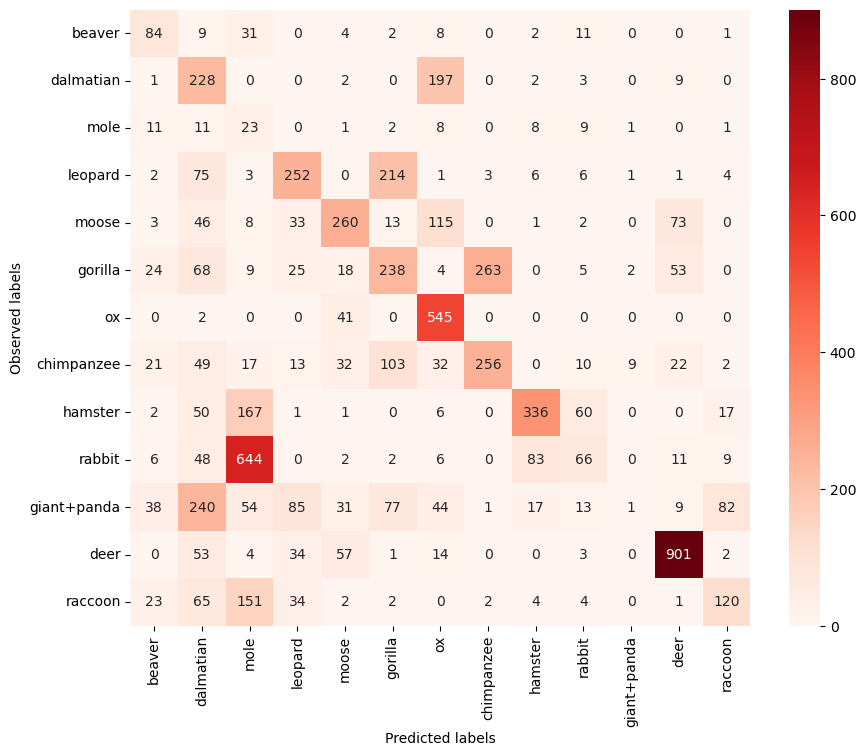

              precision    recall  f1-score   support

ARTIODACTYLA       0.80      0.91      0.85      2211
   CARNIVORA       0.71      0.56      0.63      2110
EULIPOTYPHLA       0.02      0.31      0.04        75
  LAGOMORPHA       0.34      0.08      0.12       877
    PRIMATES       0.73      0.67      0.70      1275
    RODENTIA       0.63      0.54      0.58       792

    accuracy                           0.62      7340
   macro avg       0.54      0.51      0.49      7340
weighted avg       0.68      0.62      0.64      7340

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.90728177 0.56255924 0.30666667 0.07525656 0.6745098  0.53535354]
Top_1_accuracy for UnSeen Validation split 01 -  0.5102712628406273


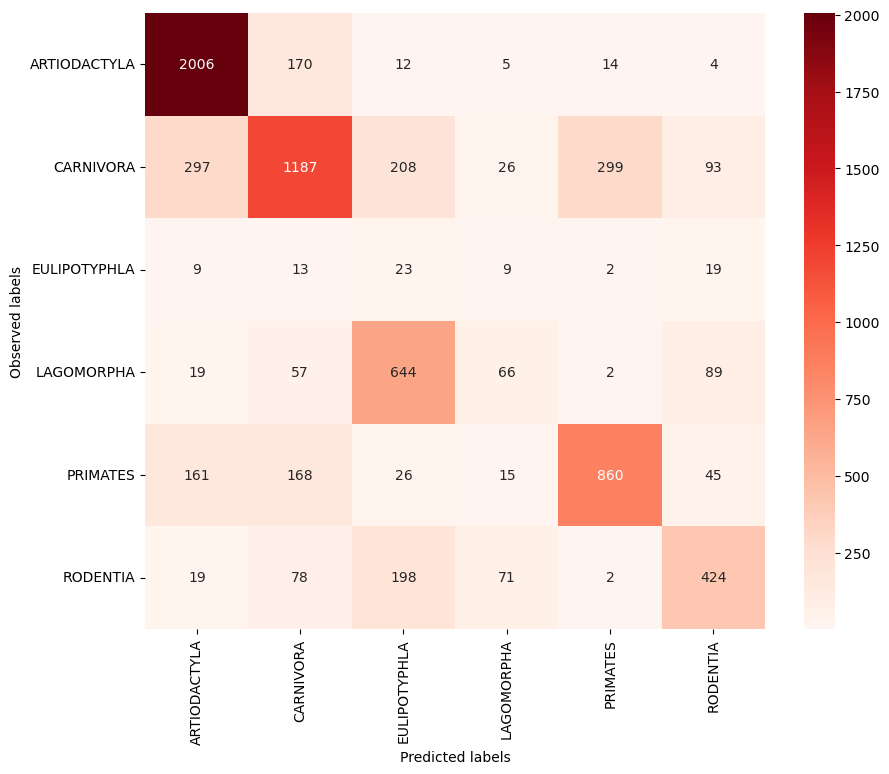

 Top- 2  Accuracy per class 
 Top- 2  Accuracy =  0.6298929889274588 
              0         1
0        beaver  0.644737
1     dalmatian  0.597285
2          mole  0.493333
3       leopard  0.795775
4         moose  0.747292
5       gorilla  0.664316
6            ox  0.996599
7    chimpanzee  0.621908
8       hamster  0.826562
9        rabbit  0.225770
10  giant+panda  0.037572
11         deer  0.934518
12      raccoon  0.602941 

 Top- 3  Accuracy per class 
 Top- 3  Accuracy =  0.7471748241334584 
              0         1
0        beaver  0.750000
1     dalmatian  0.751131
2          mole  0.586667
3       leopard  0.873239
4         moose  0.817690
5       gorilla  0.840621
6            ox  0.998299
7    chimpanzee  0.699647
8       hamster  0.945312
9        rabbit  0.657925
10  giant+panda  0.093931
11         deer  0.963517
12      raccoon  0.735294 

 Top- 4  Accuracy per class 
 Top- 4  Accuracy =  0.8183601922899174 
              0         1
0        beaver  0.815789
1     

In [26]:
CZSL(mode = 'Train', split = 1, penalty = 'l2', C = 1.0, solver = 'lbfgs', pred_type = 'Deterministic', dist_type = 'euclidean')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 2

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

### 7.2 Train Validation Split 02

Execution time: 85.99854969978333 seconds
              precision    recall  f1-score   support

       black       0.96      0.95      0.95       974
       white       0.94      0.94      0.94       691
        blue       1.00      1.00      1.00        57
       brown       0.99      0.99      0.99      1173
        gray       0.97      0.97      0.97       778
      orange       1.00      0.99      0.99        70
         red       0.00      0.00      0.00         0
      yellow       1.00      0.98      0.99       139
     patches       0.94      0.94      0.94       737
       spots       0.93      0.95      0.94       382
     stripes       0.95      0.97      0.96       111
       furry       1.00      1.00      1.00      1421
    hairless       0.98      0.98      0.98       252
   toughskin       0.98      0.97      0.97       681
         big       0.99      0.99      0.99      1276
       small       0.96      0.96      0.96       535
     bulbous       0.97      0.96      

alt.LayerChart(...)

alt.LayerChart(...)

              precision    recall  f1-score   support

    antelope       0.68      0.98      0.80       864
grizzly+bear       0.77      0.58      0.66       690
killer+whale       0.94      0.84      0.89       231
      beaver       0.25      0.02      0.04       152
   dalmatian       0.39      0.63      0.48       442
 persian+cat       0.55      0.36      0.44       599
       skunk       0.18      0.25      0.21       157
          ox       0.48      0.87      0.62       588
         fox       0.34      0.57      0.42       540
   chihuahua       0.26      0.43      0.32       448
       otter       0.40      0.00      0.01       592
       zebra       0.97      0.52      0.68       942
         pig       0.36      0.16      0.22       558

    accuracy                           0.53      6803
   macro avg       0.50      0.48      0.45      6803
weighted avg       0.56      0.53      0.50      6803

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.98148148 0.578260

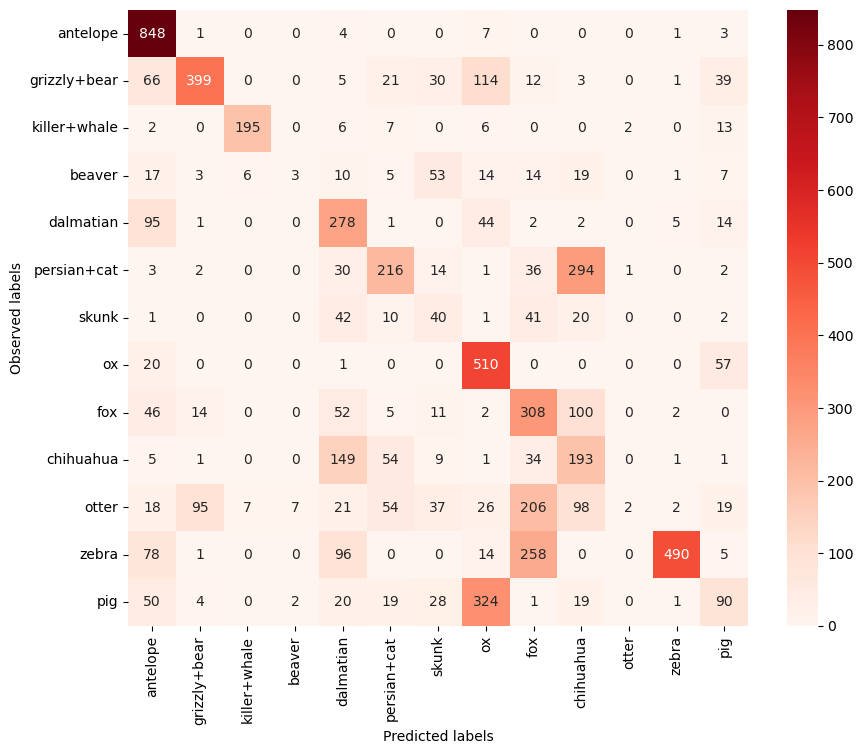

                precision    recall  f1-score   support

  ARTIODACTYLA       0.77      0.95      0.85      2241
     CARNIVORA       0.84      0.85      0.84      3468
PERISSODACTYLA       0.97      0.52      0.68       942
      RODENTIA       0.25      0.02      0.04       152

      accuracy                           0.82      6803
     macro avg       0.71      0.58      0.60      6803
  weighted avg       0.82      0.82      0.80      6803

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.94823739 0.84861592 0.52016985 0.01973684]
Top_1_accuracy for UnSeen Validation split 01 -  0.5841900011152124


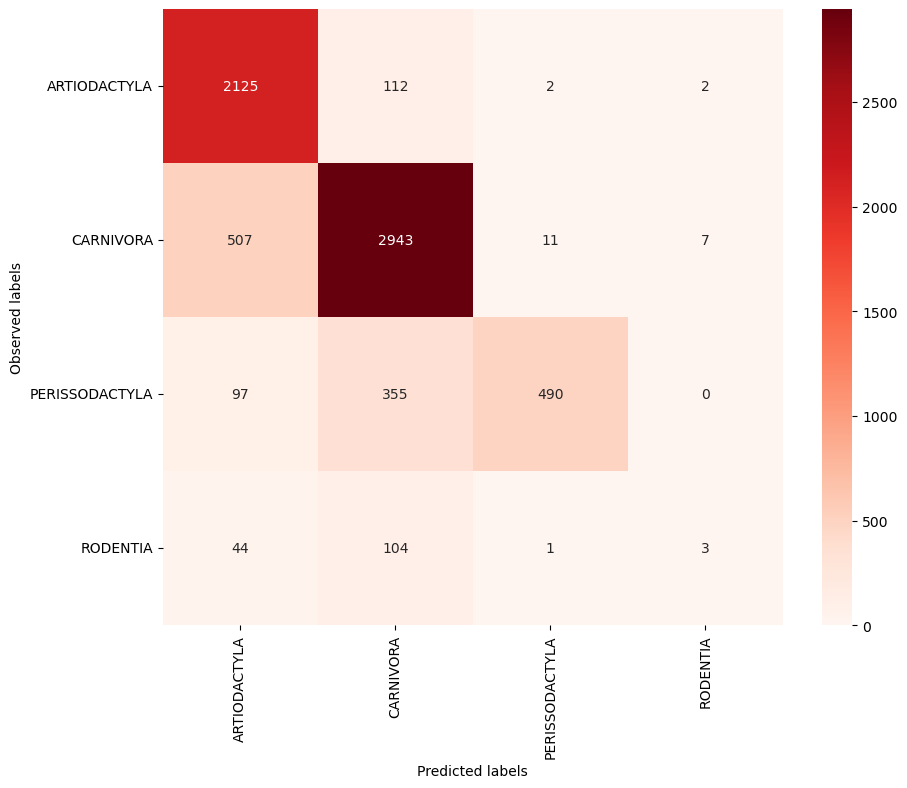

 Top- 2  Accuracy per class 
 Top- 2  Accuracy =  0.6670710484660833 
               0         1
0       antelope  0.984954
1   grizzly+bear  0.650725
2   killer+whale  0.878788
3         beaver  0.072368
4      dalmatian  0.742081
5    persian+cat  0.729549
6          skunk  0.484076
7             ox  0.988095
8            fox  0.753704
9      chihuahua  0.897321
10         otter  0.015203
11         zebra  0.794055
12           pig  0.681004 

 Top- 3  Accuracy per class 
 Top- 3  Accuracy =  0.7497715201775009 
               0         1
0       antelope  0.995370
1   grizzly+bear  0.726087
2   killer+whale  0.883117
3         beaver  0.118421
4      dalmatian  0.861991
5    persian+cat  0.931553
6          skunk  0.662420
7             ox  0.991497
8            fox  0.827778
9      chihuahua  0.962054
10         otter  0.062500
11         zebra  0.926752
12           pig  0.797491 

 Top- 4  Accuracy per class 
 Top- 4  Accuracy =  0.7985645632301199 
               0         1
0  

In [27]:
CZSL(mode = 'Train', split = 2, penalty = 'l2', C = 1.0, solver = 'lbfgs', pred_type = 'Deterministic', dist_type = 'euclidean')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 2

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

### 7.3 Train Validation Split 03

Execution time: 83.76092147827148 seconds
              precision    recall  f1-score   support

       black       0.96      0.96      0.96       918
       white       0.96      0.96      0.96       702
        blue       0.95      0.92      0.93        60
       brown       0.97      0.98      0.97      1025
        gray       0.95      0.94      0.94       451
      orange       0.97      0.98      0.97       124
         red       0.93      0.96      0.95        54
      yellow       0.99      0.96      0.97       139
     patches       0.92      0.92      0.92       566
       spots       0.90      0.91      0.90       339
     stripes       0.99      0.98      0.99       180
       furry       1.00      1.00      1.00      1463
    hairless       0.96      0.94      0.95       265
   toughskin       0.96      0.97      0.97       802
         big       0.99      0.99      0.99      1310
       small       0.95      0.94      0.95       396
     bulbous       0.98      0.98      

alt.LayerChart(...)

alt.LayerChart(...)

                precision    recall  f1-score   support

   siamese+cat       0.39      0.75      0.51       400
         moose       0.52      0.70      0.60       554
humpback+whale       0.98      0.93      0.96       565
    chimpanzee       0.83      0.88      0.85       566
      squirrel       0.51      0.30      0.38       961
    rhinoceros       0.85      0.68      0.76       561
        rabbit       0.54      0.83      0.65       877
          wolf       0.32      0.36      0.34       470
     chihuahua       0.34      0.20      0.25       448
        weasel       0.08      0.30      0.12       222
   giant+panda       0.71      0.03      0.06       692
           pig       0.55      0.52      0.53       558
       raccoon       0.14      0.00      0.01       408

      accuracy                           0.52      7282
     macro avg       0.52      0.50      0.46      7282
  weighted avg       0.56      0.52      0.49      7282

Top_1_accuracy for UnSeen Validation split 01

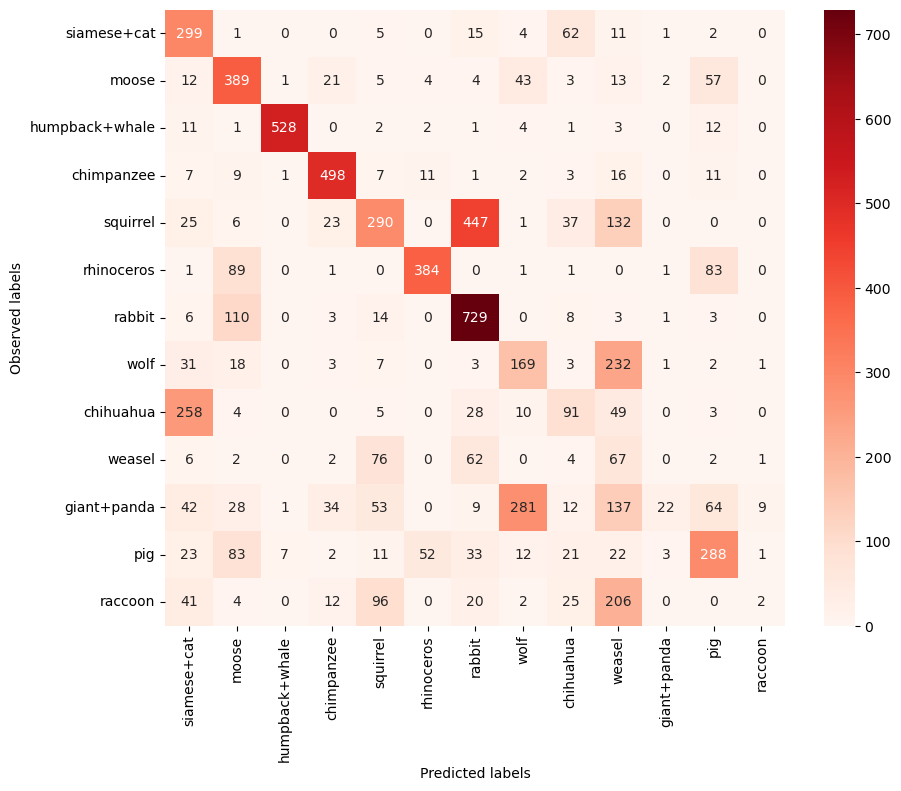

                precision    recall  f1-score   support

  ARTIODACTYLA       0.76      0.81      0.78      1677
     CARNIVORA       0.83      0.79      0.81      2640
    LAGOMORPHA       0.54      0.83      0.65       877
PERISSODACTYLA       0.85      0.68      0.76       561
      PRIMATES       0.83      0.88      0.85       566
      RODENTIA       0.51      0.30      0.38       961

      accuracy                           0.73      7282
     macro avg       0.72      0.72      0.71      7282
  weighted avg       0.74      0.73      0.73      7282

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.81454979 0.7875     0.83124287 0.68449198 0.87985866 0.30176899]
Top_1_accuracy for UnSeen Validation split 01 -  0.7165687152023884


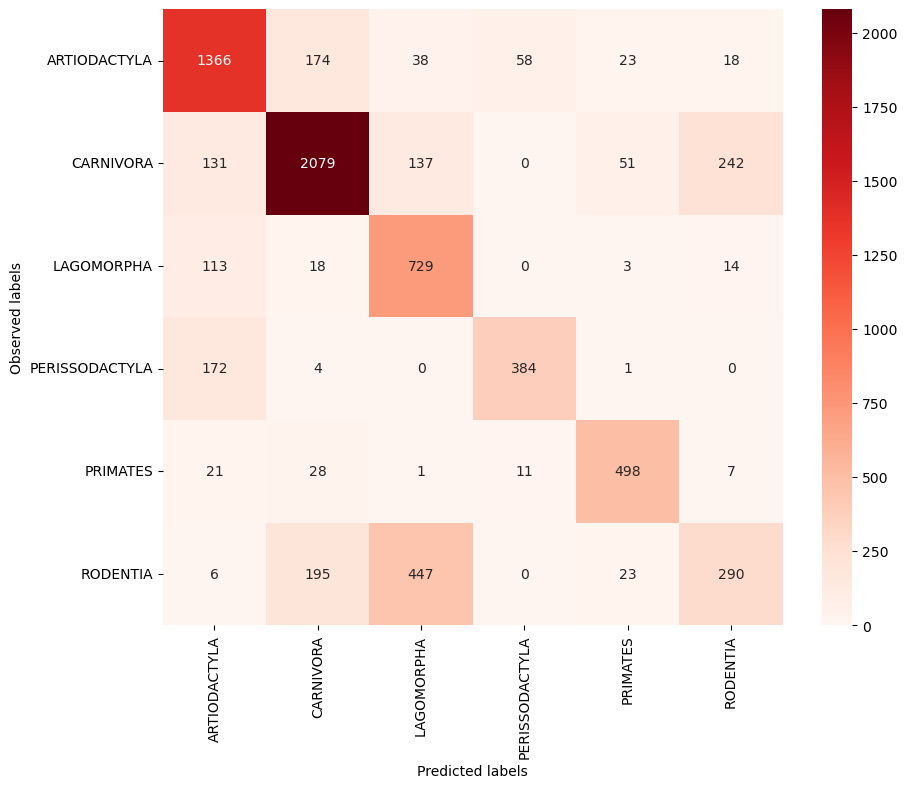

 Top- 2  Accuracy per class 
 Top- 2  Accuracy =  0.6916010545912634 
                 0         1
0      siamese+cat  0.912500
1            moose  0.819495
2   humpback+whale  0.953982
3       chimpanzee  0.911661
4         squirrel  0.781478
5       rhinoceros  0.832442
6           rabbit  0.930445
7             wolf  0.789362
8        chihuahua  0.720982
9           weasel  0.450450
10     giant+panda  0.104046
11             pig  0.727599
12         raccoon  0.056373 

 Top- 3  Accuracy per class 
 Top- 3  Accuracy =  0.7888989511738281 
                 0         1
0      siamese+cat  0.942500
1            moose  0.864621
2   humpback+whale  0.969912
3       chimpanzee  0.932862
4         squirrel  0.882414
5       rhinoceros  0.982175
6           rabbit  0.974914
7             wolf  0.891489
8        chihuahua  0.883929
9           weasel  0.792793
10     giant+panda  0.170520
11             pig  0.808244
12         raccoon  0.159314 

 Top- 4  Accuracy per class 
 Top- 4  Accura

In [28]:
CZSL(mode = 'Train', split = 3, penalty = 'l2', C = 1.0, solver = 'lbfgs', pred_type = 'Deterministic', dist_type = 'euclidean')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 2

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

# 8. Hyperparameter Optimisation

In [12]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    if __name__ == '__main__':
        # C
        penalty = trial.suggest_categorical('spenalty', ['l2'])
        # solver
        solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear'])
        # C
        C = trial.suggest_loguniform('C', .01, 100)
        # LR
        clf = OneVsRestClassifier(LogisticRegression(penalty = penalty, C = C, solver = solver, random_state=100), n_jobs=-2)
        
        LR_01 = clf.fit(X_train1.astype(np.float32).values, y_train1.astype(np.float32).values)
        y_pred_unseen1 = LR_01.predict(ValData01.iloc[:,1:2049])
        #limit search space to unseen classes 
        predicatedf_CZSL1 = predicate_df[predicate_df['classes'].isin((ValData01.classes.unique()).tolist())]
        animal_attributes1 = np.array(predicatedf_CZSL1.iloc[:,2:87])
        animal_attributes_labels1 = predicatedf_CZSL1['labels'].unique()

        #assign classes to unseen data by assigning label from closest class using Cosing Distance           
        dist_CZSL1= (1-distance.cdist(y_pred_unseen1, animal_attributes1, 'euclidean'))        
        CZSL_label_prediction1 = np.array([np.argmax(output) for output in dist_CZSL1])

        #replace predicted labels with unseen class labels 
        CZSL_label_prediction1 = np.select([CZSL_label_prediction1 == 0, CZSL_label_prediction1 == 1, CZSL_label_prediction1 == 2, CZSL_label_prediction1 == 3
              , CZSL_label_prediction1 == 4, CZSL_label_prediction1 == 5, CZSL_label_prediction1 == 6, CZSL_label_prediction1 == 7
              , CZSL_label_prediction1 == 8, CZSL_label_prediction1 == 9, CZSL_label_prediction1 == 10, CZSL_label_prediction1 == 11
              , CZSL_label_prediction1 == 12], [animal_attributes_labels1[0], animal_attributes_labels1[1], animal_attributes_labels1[2]
              , animal_attributes_labels1[3], animal_attributes_labels1[4], animal_attributes_labels1[5]
              , animal_attributes_labels1[6], animal_attributes_labels1[7], animal_attributes_labels1[8], animal_attributes_labels1[9]
              , animal_attributes_labels1[10], animal_attributes_labels1[11], animal_attributes_labels1[12]], CZSL_label_prediction1)

        recall_score1 = recall_score(ValData01['labels'], CZSL_label_prediction1, average = 'macro')
        
        LR_02 = clf.fit(X_train2.astype(np.float32).values, y_train2.astype(np.float32).values)
        y_pred_unseen2 = LR_02.predict(ValData02.iloc[:,1:2049])
        #limit search space to unseen classes 
        predicatedf_CZSL2 = predicate_df[predicate_df['classes'].isin((ValData02.classes.unique()).tolist())]
        animal_attributes2 = np.array(predicatedf_CZSL2.iloc[:,2:87])
        animal_attributes_labels2 = predicatedf_CZSL2['labels'].unique()

        #assign classes to unseen data by assigning label from closest class using Cosing Distance           
        dist_CZSL2= (1-distance.cdist(y_pred_unseen2, animal_attributes2, 'euclidean'))        
        CZSL_label_prediction2 = np.array([np.argmax(output) for output in dist_CZSL2])

        #replace predicted labels with unseen class labels 
        CZSL_label_prediction2 = np.select([CZSL_label_prediction2 == 0, CZSL_label_prediction2 == 1, CZSL_label_prediction2 == 2, CZSL_label_prediction2 == 3
              , CZSL_label_prediction2 == 4, CZSL_label_prediction2 == 5, CZSL_label_prediction2 == 6, CZSL_label_prediction2 == 7
              , CZSL_label_prediction2 == 8, CZSL_label_prediction2 == 9, CZSL_label_prediction2 == 10, CZSL_label_prediction2 == 11
              , CZSL_label_prediction2 == 12], [animal_attributes_labels2[0], animal_attributes_labels2[1], animal_attributes_labels2[2]
              , animal_attributes_labels2[3], animal_attributes_labels2[4], animal_attributes_labels2[5]
              , animal_attributes_labels2[6], animal_attributes_labels2[7], animal_attributes_labels2[8], animal_attributes_labels2[9]
              , animal_attributes_labels2[10], animal_attributes_labels2[11], animal_attributes_labels2[12]], CZSL_label_prediction2)

        recall_score2 = recall_score(ValData02['labels'], CZSL_label_prediction2, average = 'macro')
   
        
        LR_03 = clf.fit(X_train3.astype(np.float32).values, y_train3.astype(np.float32).values)
        y_pred_unseen3 = LR_03.predict(ValData03.iloc[:,1:2049])
       #limit search space to unseen classes 
        predicatedf_CZSL3 = predicate_df[predicate_df['classes'].isin((ValData03.classes.unique()).tolist())]
        animal_attributes3 = np.array(predicatedf_CZSL3.iloc[:,2:87])
        animal_attributes_labels3 = predicatedf_CZSL3['labels'].unique()

        #assign classes to unseen data by assigning label from closest class using Cosing Distance           
        dist_CZSL3= (1-distance.cdist(y_pred_unseen3, animal_attributes3, 'euclidean'))        
        CZSL_label_prediction3 = np.array([np.argmax(output) for output in dist_CZSL3])

        #replace predicted labels with unseen class labels 
        CZSL_label_prediction3 = np.select([CZSL_label_prediction3 == 0, CZSL_label_prediction3 == 1, CZSL_label_prediction3 == 2, CZSL_label_prediction3 == 3
              , CZSL_label_prediction3 == 4, CZSL_label_prediction3 == 5, CZSL_label_prediction3 == 6, CZSL_label_prediction3 == 7
              , CZSL_label_prediction3 == 8, CZSL_label_prediction3 == 9, CZSL_label_prediction3 == 10, CZSL_label_prediction3 == 11
              , CZSL_label_prediction3 == 12], [animal_attributes_labels3[0], animal_attributes_labels3[1], animal_attributes_labels3[2]
              , animal_attributes_labels3[3], animal_attributes_labels3[4], animal_attributes_labels3[5]
              , animal_attributes_labels3[6], animal_attributes_labels3[7], animal_attributes_labels3[8], animal_attributes_labels3[9]
              , animal_attributes_labels3[10], animal_attributes_labels3[11], animal_attributes_labels3[12]], CZSL_label_prediction3)

        recall_score3 = recall_score(ValData03['labels'], CZSL_label_prediction3, average = 'macro')

        
        results = [recall_score1,recall_score2,recall_score3]
        return np.mean(results)

st = time.time()
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))
    
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

[I 2022-12-01 00:40:37,904] A new study created in memory with name: no-name-15b08749-783b-448a-8507-d9e039486e34
[I 2022-12-01 01:01:02,736] Trial 0 finished with value: 0.47957728309528175 and parameters: {'spenalty': 'l2', 'solver': 'newton-cg', 'C': 1.0701866153830828}. Best is trial 0 with value: 0.47957728309528175.
[I 2022-12-01 01:06:56,658] Trial 1 finished with value: 0.487981913156702 and parameters: {'spenalty': 'l2', 'solver': 'liblinear', 'C': 0.07051735758810201}. Best is trial 1 with value: 0.487981913156702.
[I 2022-12-01 01:13:10,608] Trial 2 finished with value: 0.4844042200398683 and parameters: {'spenalty': 'l2', 'solver': 'liblinear', 'C': 0.10226950360025565}. Best is trial 1 with value: 0.487981913156702.
[I 2022-12-01 01:17:20,955] Trial 3 finished with value: 0.4743639604580621 and parameters: {'spenalty': 'l2', 'solver': 'lbfgs', 'C': 56.219967517288886}. Best is trial 1 with value: 0.487981913156702.
[I 2022-12-01 01:33:35,022] Trial 4 finished with value: 0

Number of finished trials: 10
Best trial:
  Value: 0.4969227170283768
  Params: 
    spenalty: l2
    solver: newton-cg
    C: 0.010038038326412521
Execution time: 6128.9286673069 seconds


# 9. Retrain LR with best parameters on three train val splits

### 9.1 Train Validation Split 01

Execution time: 262.70556831359863 seconds
              precision    recall  f1-score   support

       black       0.95      0.97      0.96       882
       white       0.95      0.94      0.95       678
        blue       0.92      0.90      0.91       117
       brown       0.97      0.97      0.97       950
        gray       0.95      0.96      0.96       739
      orange       0.98      0.95      0.96       124
         red       0.96      0.91      0.93        54
      yellow       1.00      0.98      0.99        82
     patches       0.94      0.90      0.92       390
       spots       0.94      0.86      0.90       187
     stripes       1.00      0.98      0.99       180
       furry       1.00      1.00      1.00      1288
    hairless       0.98      0.98      0.98       331
   toughskin       0.99      0.99      0.99       826
         big       0.99      0.99      0.99      1188
       small       0.97      0.97      0.97       512
     bulbous       0.98      0.98     

alt.LayerChart(...)

alt.LayerChart(...)

              precision    recall  f1-score   support

      beaver       0.47      0.62      0.54       152
   dalmatian       0.23      0.44      0.30       442
        mole       0.03      0.36      0.05        75
     leopard       0.48      0.41      0.45       568
       moose       0.62      0.48      0.54       554
     gorilla       0.32      0.34      0.33       709
          ox       0.54      0.93      0.69       588
  chimpanzee       0.52      0.46      0.49       566
     hamster       0.76      0.57      0.65       640
      rabbit       0.46      0.09      0.16       877
 giant+panda       0.00      0.00      0.00       692
        deer       0.81      0.87      0.84      1069
     raccoon       0.61      0.39      0.47       408

    accuracy                           0.46      7340
   macro avg       0.45      0.46      0.42      7340
weighted avg       0.50      0.46      0.45      7340

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.625      0.438914

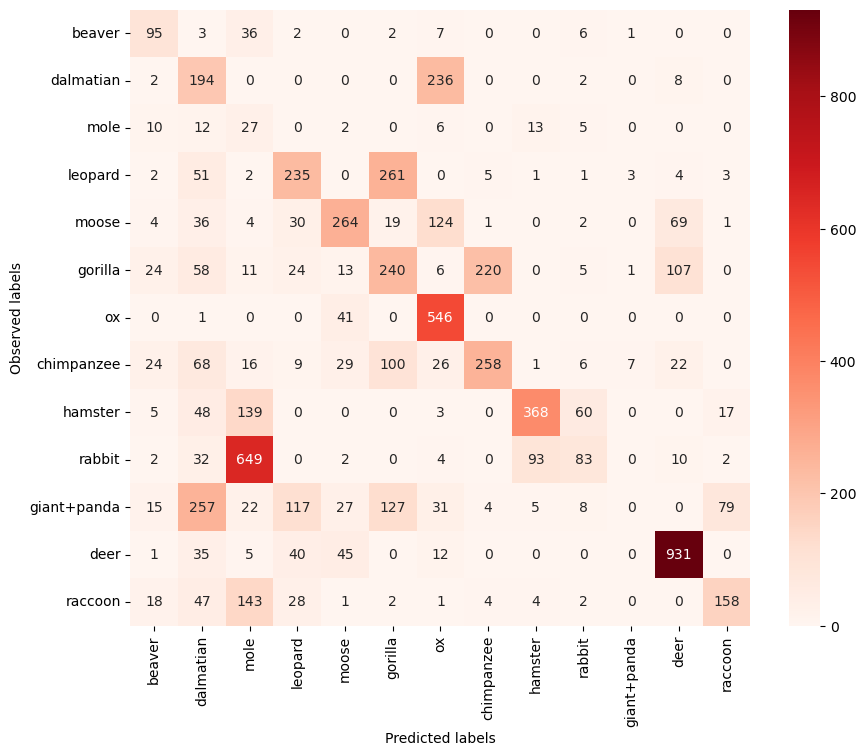

              precision    recall  f1-score   support

ARTIODACTYLA       0.79      0.92      0.85      2211
   CARNIVORA       0.73      0.56      0.63      2110
EULIPOTYPHLA       0.03      0.36      0.05        75
  LAGOMORPHA       0.46      0.09      0.16       877
    PRIMATES       0.66      0.64      0.65      1275
    RODENTIA       0.68      0.59      0.63       792

    accuracy                           0.63      7340
   macro avg       0.56      0.53      0.49      7340
weighted avg       0.69      0.63      0.64      7340

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.91904116 0.55545024 0.36       0.09464082 0.64156863 0.59090909]
Top_1_accuracy for UnSeen Validation split 01 -  0.5269349890257732


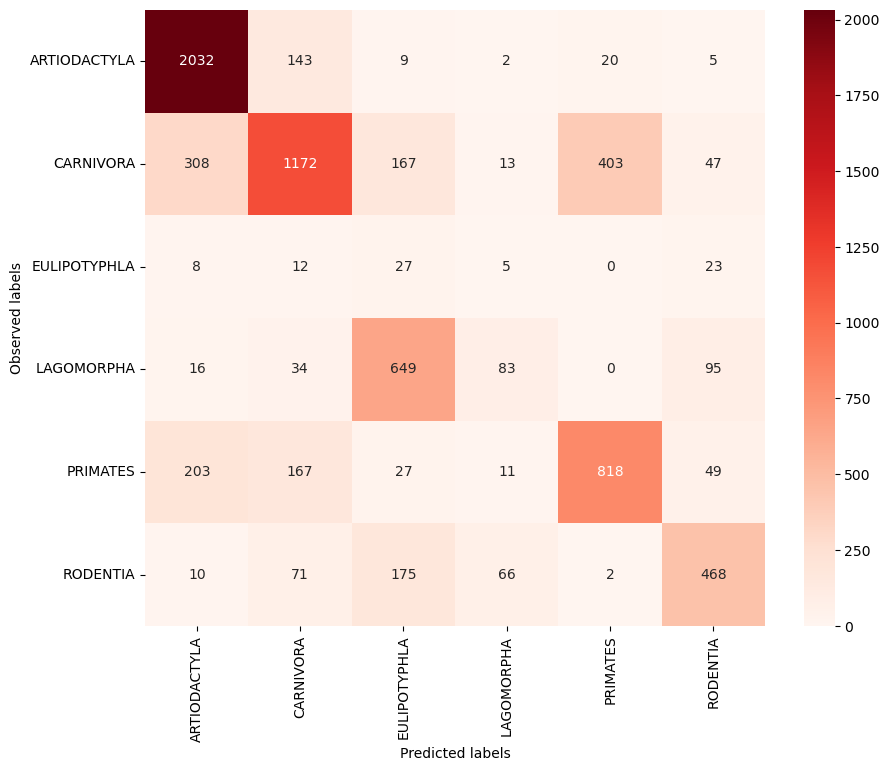

 Top- 2  Accuracy per class 
 Top- 2  Accuracy =  0.6439367696479361 
              0         1
0        beaver  0.703947
1     dalmatian  0.545249
2          mole  0.520000
3       leopard  0.823944
4         moose  0.776173
5       gorilla  0.655853
6            ox  0.998299
7    chimpanzee  0.593640
8       hamster  0.887500
9        rabbit  0.226910
10  giant+panda  0.021676
11         deer  0.931712
12      raccoon  0.686275 

 Top- 3  Accuracy per class 
 Top- 3  Accuracy =  0.779344184679463 
              0         1
0        beaver  0.776316
1     dalmatian  0.714932
2          mole  0.733333
3       leopard  0.882042
4         moose  0.837545
5       gorilla  0.853315
6            ox  1.000000
7    chimpanzee  0.701413
8       hamster  0.957812
9        rabbit  0.817560
10  giant+panda  0.072254
11         deer  0.966324
12      raccoon  0.818627 

 Top- 4  Accuracy per class 
 Top- 4  Accuracy =  0.8397068236667832 
              0         1
0        beaver  0.868421
1     d

In [30]:
CZSL(mode = 'Train', split = 1, penalty = 'l2', C = 0.010038038326412521, solver = 'newton-cg', pred_type = 'Deterministic', dist_type = 'euclidean')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 2

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

### 9.2 Train Validation Split 02

Execution time: 258.9440064430237 seconds
              precision    recall  f1-score   support

       black       0.97      0.96      0.96       974
       white       0.95      0.94      0.95       691
        blue       1.00      1.00      1.00        57
       brown       0.99      0.99      0.99      1173
        gray       0.98      0.97      0.98       778
      orange       1.00      0.99      0.99        70
         red       0.00      0.00      0.00         0
      yellow       1.00      0.98      0.99       139
     patches       0.96      0.96      0.96       737
       spots       0.95      0.95      0.95       382
     stripes       0.97      0.97      0.97       111
       furry       1.00      1.00      1.00      1421
    hairless       0.99      0.96      0.98       252
   toughskin       0.98      0.97      0.97       681
         big       0.99      1.00      1.00      1276
       small       0.97      0.96      0.97       535
     bulbous       0.97      0.96      

alt.LayerChart(...)

alt.LayerChart(...)

              precision    recall  f1-score   support

    antelope       0.70      0.99      0.82       864
grizzly+bear       0.79      0.65      0.71       690
killer+whale       0.95      0.82      0.88       231
      beaver       0.33      0.03      0.06       152
   dalmatian       0.39      0.60      0.47       442
 persian+cat       0.45      0.24      0.31       599
       skunk       0.22      0.35      0.27       157
          ox       0.46      0.92      0.61       588
         fox       0.47      0.65      0.54       540
   chihuahua       0.30      0.55      0.39       448
       otter       0.00      0.00      0.00       592
       zebra       0.99      0.70      0.82       942
         pig       0.24      0.07      0.11       558

    accuracy                           0.56      6803
   macro avg       0.48      0.51      0.46      6803
weighted avg       0.53      0.56      0.52      6803

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.98611111 0.647826

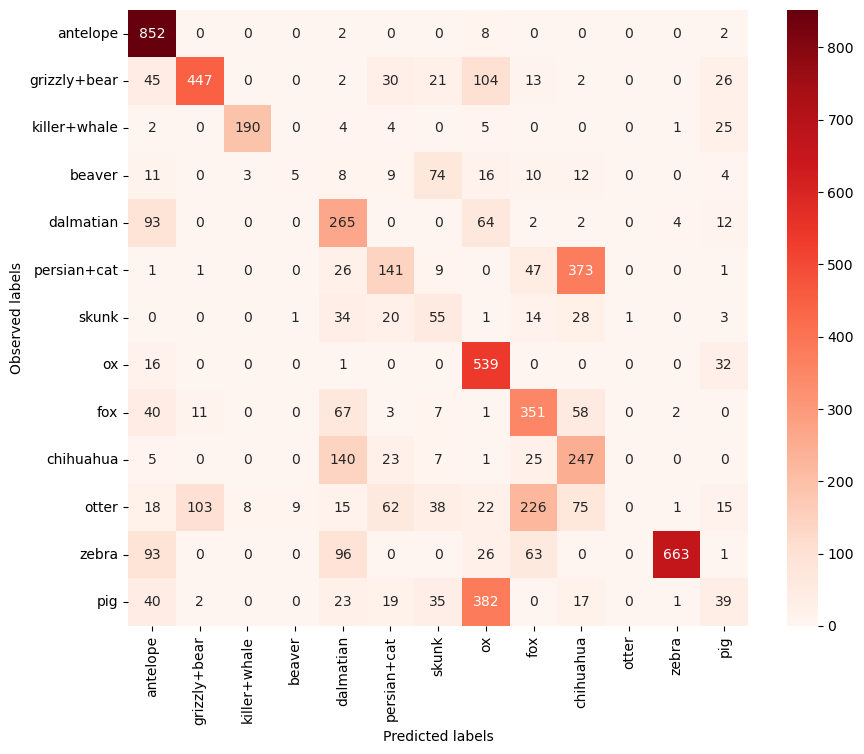

                precision    recall  f1-score   support

  ARTIODACTYLA       0.78      0.95      0.86      2241
     CARNIVORA       0.89      0.86      0.87      3468
PERISSODACTYLA       0.99      0.70      0.82       942
      RODENTIA       0.33      0.03      0.06       152

      accuracy                           0.85      6803
     macro avg       0.75      0.64      0.65      6803
  weighted avg       0.85      0.85      0.84      6803

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.951361   0.86245675 0.70382166 0.03289474]
Top_1_accuracy for UnSeen Validation split 01 -  0.6376335349629189


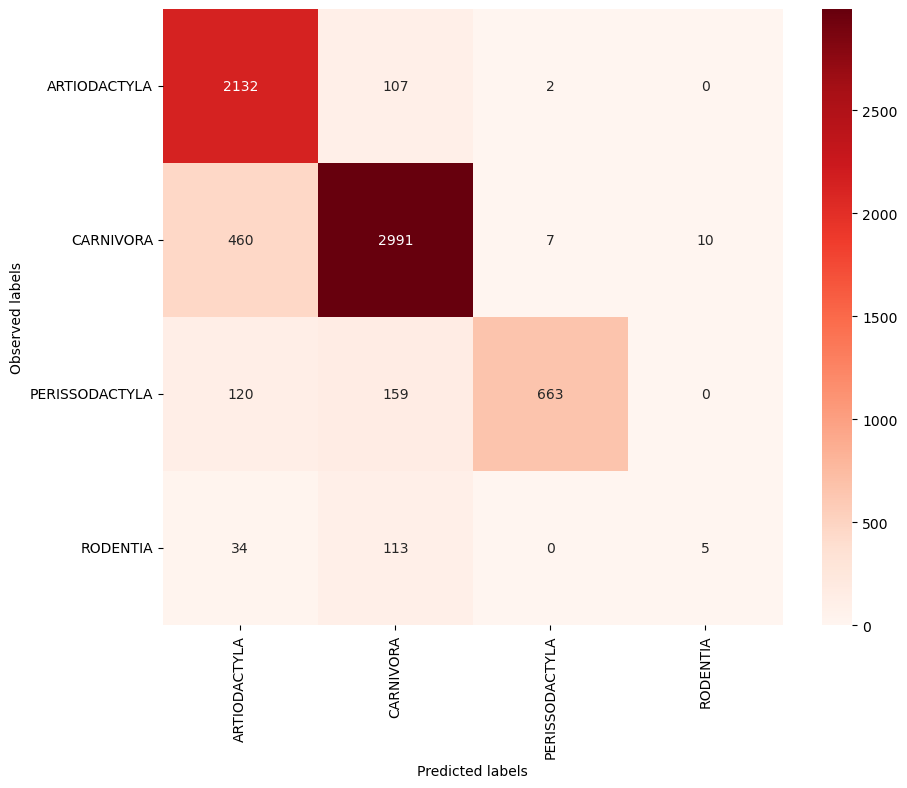

 Top- 2  Accuracy per class 
 Top- 2  Accuracy =  0.6921515421401316 
               0         1
0       antelope  0.990741
1   grizzly+bear  0.707246
2   killer+whale  0.844156
3         beaver  0.052632
4      dalmatian  0.708145
5    persian+cat  0.734558
6          skunk  0.605096
7             ox  0.996599
8            fox  0.794444
9      chihuahua  0.935268
10         otter  0.023649
11         zebra  0.911890
12           pig  0.693548 

 Top- 3  Accuracy per class 
 Top- 3  Accuracy =  0.7712936020938894 
               0         1
0       antelope  1.000000
1   grizzly+bear  0.755072
2   killer+whale  0.852814
3         beaver  0.144737
4      dalmatian  0.873303
5    persian+cat  0.929883
6          skunk  0.751592
7             ox  0.996599
8            fox  0.898148
9      chihuahua  0.977679
10         otter  0.062500
11         zebra  0.979830
12           pig  0.804659 

 Top- 4  Accuracy per class 
 Top- 4  Accuracy =  0.8190636840847879 
               0         1
0  

In [31]:
CZSL(mode = 'Train', split = 2, penalty = 'l2', C = 0.010038038326412521, solver = 'newton-cg', pred_type = 'Deterministic', dist_type = 'euclidean')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 2

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

### 9.3 Train Validation Split 03

Execution time: 263.70688486099243 seconds
              precision    recall  f1-score   support

       black       0.95      0.96      0.96       918
       white       0.98      0.96      0.97       702
        blue       0.95      0.88      0.91        60
       brown       0.97      0.99      0.98      1025
        gray       0.94      0.94      0.94       451
      orange       0.97      0.98      0.97       124
         red       0.93      0.94      0.94        54
      yellow       0.99      0.96      0.97       139
     patches       0.94      0.94      0.94       566
       spots       0.93      0.89      0.91       339
     stripes       0.99      0.98      0.99       180
       furry       1.00      1.00      1.00      1463
    hairless       0.97      0.95      0.96       265
   toughskin       0.97      0.98      0.97       802
         big       0.99      0.99      0.99      1310
       small       0.96      0.93      0.95       396
     bulbous       0.98      0.99     

alt.LayerChart(...)

alt.LayerChart(...)

                precision    recall  f1-score   support

   siamese+cat       0.41      0.74      0.53       400
         moose       0.50      0.74      0.60       554
humpback+whale       0.99      0.94      0.96       565
    chimpanzee       0.82      0.90      0.86       566
      squirrel       0.59      0.38      0.46       961
    rhinoceros       0.81      0.67      0.73       561
        rabbit       0.56      0.77      0.65       877
          wolf       0.43      0.58      0.50       470
     chihuahua       0.35      0.24      0.28       448
        weasel       0.10      0.38      0.15       222
   giant+panda       0.40      0.00      0.01       692
           pig       0.58      0.50      0.54       558
       raccoon       0.50      0.01      0.01       408

      accuracy                           0.54      7282
     macro avg       0.54      0.53      0.48      7282
  weighted avg       0.57      0.54      0.51      7282

Top_1_accuracy for UnSeen Validation split 01

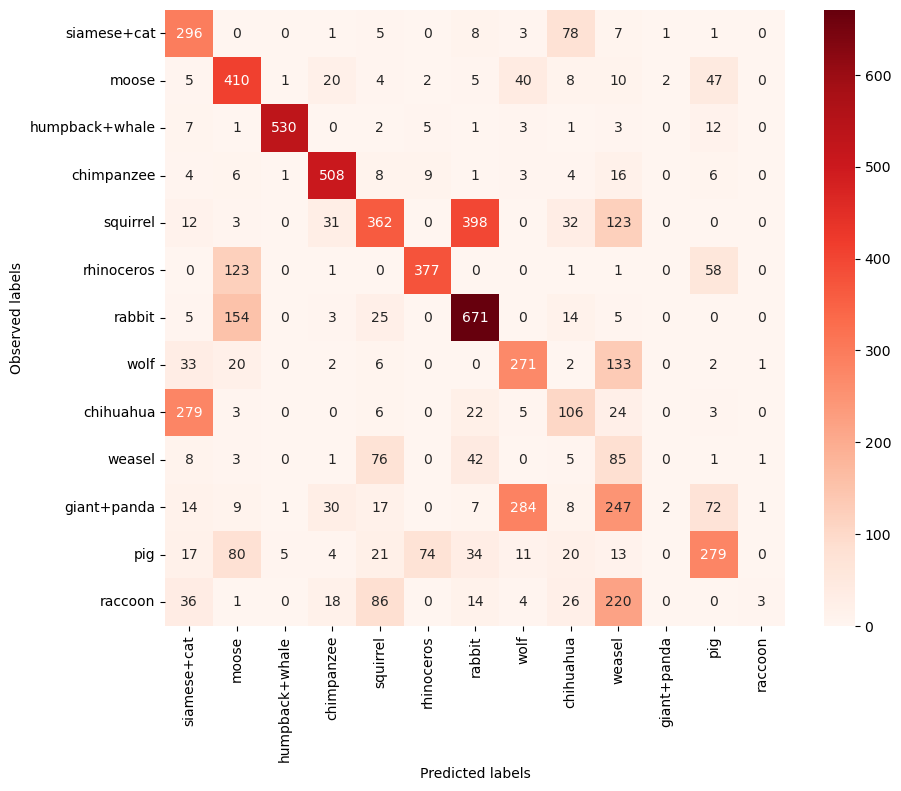

                precision    recall  f1-score   support

  ARTIODACTYLA       0.75      0.81      0.78      1677
     CARNIVORA       0.86      0.83      0.84      2640
    LAGOMORPHA       0.56      0.77      0.65       877
PERISSODACTYLA       0.81      0.67      0.73       561
      PRIMATES       0.82      0.90      0.86       566
      RODENTIA       0.59      0.38      0.46       961

      accuracy                           0.75      7282
     macro avg       0.73      0.73      0.72      7282
  weighted avg       0.75      0.75      0.75      7282

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.81395349 0.82689394 0.76510832 0.67201426 0.8975265  0.37669095]
Top_1_accuracy for UnSeen Validation split 01 -  0.7253645767573159


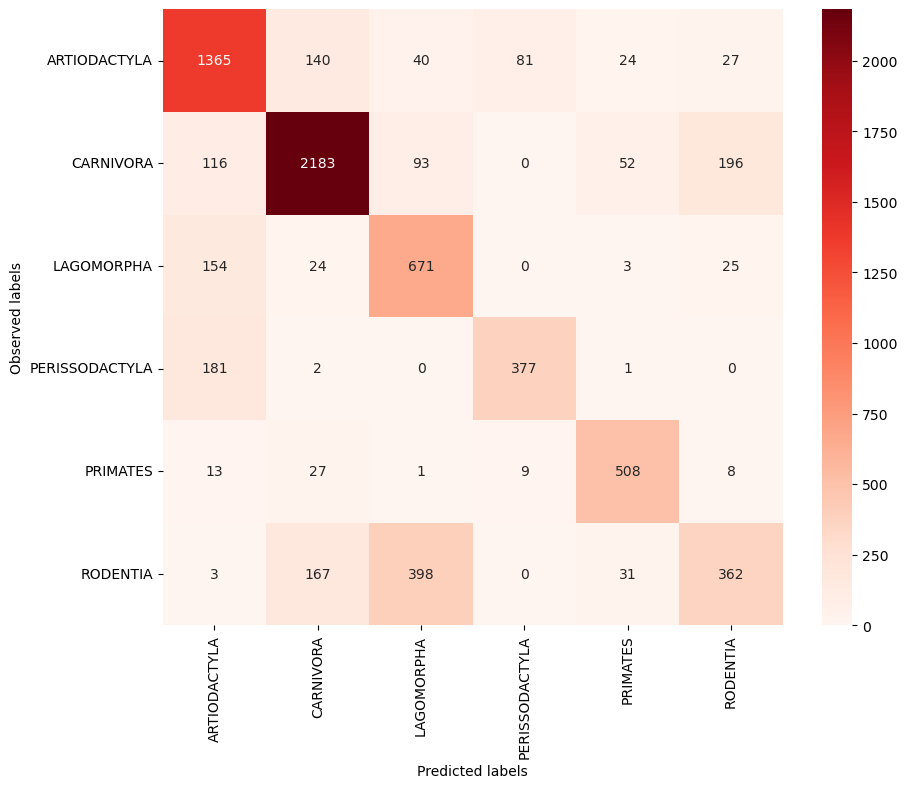

 Top- 2  Accuracy per class 
 Top- 2  Accuracy =  0.7144138055163333 
                 0         1
0      siamese+cat  0.922500
1            moose  0.833935
2   humpback+whale  0.959292
3       chimpanzee  0.918728
4         squirrel  0.856400
5       rhinoceros  0.837790
6           rabbit  0.884835
7             wolf  0.872340
8        chihuahua  0.834821
9           weasel  0.581081
10     giant+panda  0.008671
11             pig  0.713262
12         raccoon  0.063725 

 Top- 3  Accuracy per class 
 Top- 3  Accuracy =  0.7943542875820794 
                 0         1
0      siamese+cat  0.957500
1            moose  0.868231
2   humpback+whale  0.976991
3       chimpanzee  0.938163
4         squirrel  0.926119
5       rhinoceros  0.985740
6           rabbit  0.960091
7             wolf  0.914894
8        chihuahua  0.935268
9           weasel  0.833333
10     giant+panda  0.027457
11             pig  0.818996
12         raccoon  0.183824 

 Top- 4  Accuracy per class 
 Top- 4  Accura

In [32]:
CZSL(mode = 'Train', split = 3, penalty = 'l2', C = 0.010038038326412521, solver = 'newton-cg', pred_type = 'Deterministic', dist_type = 'euclidean')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 2

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

# 10. CZSL on Unseen Test Set

Execution time: 457.9621901512146 seconds
Unseen Class Labels
[ 7  9 23 24 30 31 34 41 47 50]
t-SNE spatialisation of Unseen Classes
[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.898930
[t-SNE] KL divergence after 1000 iterations: 0.250724


alt.LayerChart(...)

alt.LayerChart(...)

              precision    recall  f1-score   support

       horse       0.14      0.17      0.15      1645
  blue+whale       0.15      0.98      0.26       174
       sheep       0.37      0.60      0.46      1420
        seal       0.41      0.28      0.33       988
         bat       1.00      0.00      0.01       383
     giraffe       0.15      0.03      0.05      1202
         rat       0.43      0.81      0.56       310
      bobcat       0.81      0.83      0.82       630
      walrus       0.22      0.10      0.14       215
     dolphin       0.31      0.07      0.11       946

    accuracy                           0.31      7913
   macro avg       0.40      0.39      0.29      7913
weighted avg       0.34      0.31      0.27      7913

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.16595745 0.98275862 0.60352113 0.27631579 0.00261097 0.02995008
 0.81290323 0.82698413 0.10232558 0.06659619]
Top_1_accuracy for UnSeen Validation split 01 -  0.38699231616736285


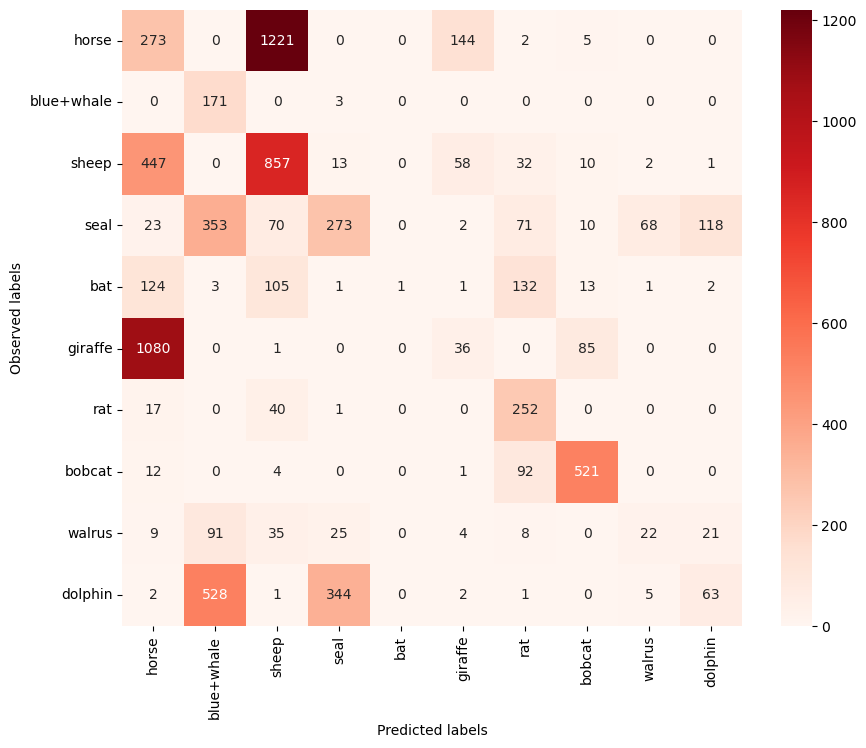

                precision    recall  f1-score   support

  ARTIODACTYLA       0.44      0.46      0.45      3742
     CARNIVORA       0.66      0.50      0.57      1833
    CHIROPTERA       1.00      0.00      0.01       383
PERISSODACTYLA       0.14      0.17      0.15      1645
      RODENTIA       0.43      0.81      0.56       310

      accuracy                           0.40      7913
     macro avg       0.53      0.39      0.35      7913
  weighted avg       0.45      0.40      0.40      7913

Top_1_accuracy for UnSeen Validation split 01 per class -  [0.45911277 0.50136388 0.00261097 0.16595745 0.81290323]
Top_1_accuracy for UnSeen Validation split 01 -  0.38838965938654046


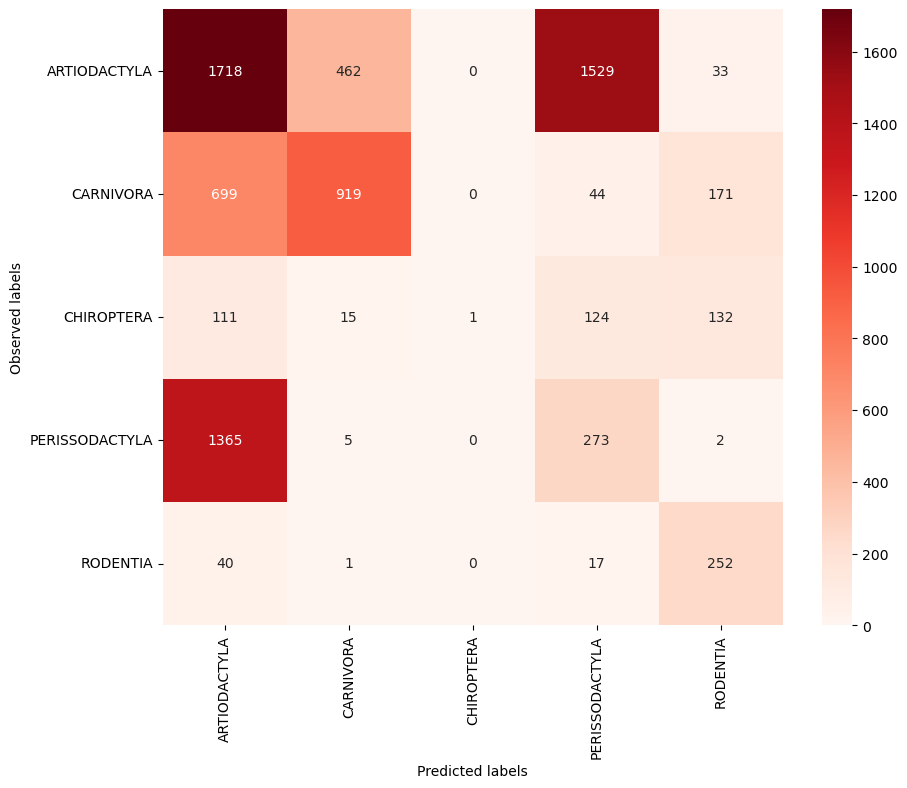

 Top- 2  Accuracy per class 
 Top- 2  Accuracy =  0.6873602969105382 
            0         1
0       horse  0.778723
1  blue+whale  0.988506
2       sheep  0.854225
3        seal  0.435223
4         bat  0.028721
5     giraffe  0.896839
6         rat  0.929032
7      bobcat  0.968254
8      walrus  0.493023
9     dolphin  0.501057 

 Top- 3  Accuracy per class 
 Top- 3  Accuracy =  0.8028204472266737 
            0         1
0       horse  0.997568
1  blue+whale  1.000000
2       sheep  0.959859
3        seal  0.594130
4         bat  0.096606
5     giraffe  0.949251
6         rat  0.990323
7      bobcat  0.982540
8      walrus  0.595349
9     dolphin  0.862579 

 Top- 4  Accuracy per class 
 Top- 4  Accuracy =  0.8794969570199276 
            0         1
0       horse  0.999392
1  blue+whale  1.000000
2       sheep  0.983803
3        seal  0.794534
4         bat  0.234987
5     giraffe  0.998336
6         rat  0.993548
7      bobcat  0.988889
8      walrus  0.804651
9     dolphin  0.9

In [34]:
LR_binary_animal_attributes = CZSL(mode = 'Test', split = 1, penalty = 'l2', C = 0.010038038326412521, solver = 'newton-cg', pred_type = 'Deterministic', dist_type = 'euclidean')

#mode
#1. "Train" - Use Train Val split
#2. "Test" - For Unseen Test Data

#split
# 1 -Train/Val Split 1
# 2 -Train/Val Split 2
# 3 -Train/Val Split 2

#pred_type
#1. "Probabilistic" - continous real numbers giving probability for prdiction to be 1
#2. "Deterministic" - 1 or 0 prediction values

#dist_type
#1. euclidean
#2. cosine
#3. hamming
#4. jaccard

# 11. Save final ZSL Model

In [35]:
# save the model to disk
import pickle
filename = 'C:/Dissertation/Models/LR_Binary_Animal_Attributes_ZSL.sav'
pickle.dump(LR_binary_animal_attributes, open(filename, 'wb'))